# <b> GROUP ASSIGNMENT: Factors affecting apartment rental costs in Hanoi (3-2023) </b>

## Source of __[data](https://drive.google.com/file/d/1fZrhmIyD9Faipkeg1CZHtS1pv8YxQ4na/view?usp=sharing)__ :
First 200 results of apartments for rent in Hanoi listed on __[batdongsan.com.vn](batdongsan.com.vn)__ on March 2023. Gathered by Nguyen Ngoc Khoa, saved as .csv <br>
<ul>
<li>BR : Number of bedrooms</li>
<li>WC: Number of washrooms</li>
<li>WCdummy: 0 - apartments with 1 washroom, 1 - apartment with more than 1 washroom</li>
<li>Furni: Is furniture included ? 0 - no, 1 - yes</li>
<li>Area: Area of the apartment (square meter)</li>
<li>DistToCenter: Distance from listed apartment to center of Hanoi (Hoan Kiem Lake) using the preferred route suggested by Google Maps (kilometers)</li>
<li>TimeToCenter: Time suggested by Google Maps when taking the route listed in DistToCenter variable (minutes)</li>
<li>Price: Apartment rental price for one month (million VND)</li>
</ul>


Attaching the data:

In [1]:
data <- read.csv('D:/chungcu.csv')
attach(data)

## Descriptive statistics of variables:

Summary statistics:

In [2]:
summary(data)

       BR             WC           Furni           Area         DistToCenter   
 Min.   :1.00   Min.   :1.00   Min.   :0.00   Min.   : 43.00   Min.   : 2.200  
 1st Qu.:2.00   1st Qu.:2.00   1st Qu.:0.00   1st Qu.: 75.00   1st Qu.: 5.900  
 Median :2.00   Median :2.00   Median :1.00   Median : 90.00   Median : 7.900  
 Mean   :2.36   Mean   :1.86   Mean   :0.61   Mean   : 95.69   Mean   : 8.188  
 3rd Qu.:3.00   3rd Qu.:2.00   3rd Qu.:1.00   3rd Qu.:115.00   3rd Qu.:10.200  
 Max.   :4.00   Max.   :3.00   Max.   :1.00   Max.   :180.00   Max.   :15.500  
  TimeToCenter       Price          WCdummy     
 Min.   :10.00   Min.   : 6.00   Min.   :0.000  
 1st Qu.:22.00   1st Qu.:13.88   1st Qu.:1.000  
 Median :28.00   Median :16.00   Median :1.000  
 Mean   :28.97   Mean   :18.14   Mean   :0.785  
 3rd Qu.:34.00   3rd Qu.:20.00   3rd Qu.:1.000  
 Max.   :44.00   Max.   :55.00   Max.   :1.000  

###### BR variable only consists of integer values between [1:4] as number of bedrooms in an apartment cannot be a decimal. <br>
###### WC variable only consists of integer values between [1:3] as number of washrooms in an apartment cannot be a decimal.


Correlation matrix: High correlation between BR and WC, possible multicollinearity error. 

In [3]:
cor(data[1:7])

,BR,WC,Furni,Area,DistToCenter,TimeToCenter,Price
BR,1.00000000,0.726709549,-0.01248737,0.83750840,0.023455422,0.049154809,0.5153628
WC,0.72670955,1.000000000,0.08043214,0.71841356,-0.003766987,0.004777875,0.4695828
Furni,-0.01248737,0.080432136,1.00000000,0.08976559,-0.088266035,-0.062864202,0.2987830
Area,0.83750840,0.718413559,0.08976559,1.00000000,-0.115838971,-0.085497350,0.6165050
DistToCenter,0.02345542,-0.003766987,-0.08826604,-0.11583897,1.000000000,0.864965410,-0.3163879
TimeToCenter,0.04915481,0.004777875,-0.06286420,-0.08549735,0.864965410,1.000000000,-0.2255649
Price,0.51536283,0.469582818,0.29878297,0.61650499,-0.316387914,-0.225564860,1.0000000


## Loading in necessary libraries

lmtest is for hypothesis testing of errors presence in models. <br>
Metrics is for different error types regarding goodness of fit.

In [51]:
library('lmtest')
library('Metrics')
library('car')


Loading required package: carData



## Initial models
We start with 4 initial models. From this point on, the default level of ∝ is 5%

### Model 1

In [5]:
test1 <- lm(Price ~ BR + Furni + Area + DistToCenter + TimeToCenter + WC)
summary(test1)


Call:
lm(formula = Price ~ BR + Furni + Area + DistToCenter + TimeToCenter + 
    WC)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6136  -3.5560  -0.3655   2.1497  24.4877 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.36905    2.05732   2.610 0.009772 ** 
BR            1.36373    1.01285   1.346 0.179742    
Furni         3.62749    0.79811   4.545 9.67e-06 ***
Area          0.10533    0.02591   4.066 6.97e-05 ***
DistToCenter -0.94673    0.26053  -3.634 0.000358 ***
TimeToCenter  0.12306    0.09091   1.354 0.177428    
WC            0.77989    1.12002   0.696 0.487068    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.383 on 193 degrees of freedom
Multiple R-squared:  0.5055,	Adjusted R-squared:  0.4901 
F-statistic: 32.88 on 6 and 193 DF,  p-value: < 2.2e-16


### Model 2

In [6]:
test2 <- lm(log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter + TimeToCenter + WC)
summary(test2)


Call:
lm(formula = log(Price, base = exp(1)) ~ BR + Furni + Area + 
    DistToCenter + TimeToCenter + WC)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62317 -0.15784  0.01808  0.13465  0.61812 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.173686   0.094620  22.973  < 2e-16 ***
BR            0.103103   0.046583   2.213 0.028047 *  
Furni         0.203913   0.036706   5.555 9.11e-08 ***
Area          0.004962   0.001192   4.165 4.69e-05 ***
DistToCenter -0.044483   0.011982  -3.712 0.000269 ***
TimeToCenter  0.005813   0.004181   1.390 0.166036    
WC            0.004190   0.051512   0.081 0.935258    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2476 on 193 degrees of freedom
Multiple R-squared:  0.5506,	Adjusted R-squared:  0.5366 
F-statistic: 39.41 on 6 and 193 DF,  p-value: < 2.2e-16


### Model 3

In [7]:
test3 <- lm(Price ~ BR + Furni + Area + DistToCenter + TimeToCenter + WCdummy)
summary(test3)


Call:
lm(formula = Price ~ BR + Furni + Area + DistToCenter + TimeToCenter + 
    WCdummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.471  -3.403  -0.442   2.360  24.020 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.09608    1.99845   2.550 0.011548 *  
BR            2.03600    0.98095   2.076 0.039262 *  
Furni         3.74765    0.79019   4.743 4.09e-06 ***
Area          0.12216    0.02551   4.789 3.32e-06 ***
DistToCenter -0.90037    0.25897  -3.477 0.000627 ***
TimeToCenter  0.12004    0.09018   1.331 0.184722    
WCdummy      -2.34205    1.26128  -1.857 0.064852 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.343 on 193 degrees of freedom
Multiple R-squared:  0.513,	Adjusted R-squared:  0.4978 
F-statistic: 33.88 on 6 and 193 DF,  p-value: < 2.2e-16


### Model 4

In [8]:
test4 <- lm(log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter + TimeToCenter + WCdummy)
summary(test4)


Call:
lm(formula = log(Price, base = exp(1)) ~ BR + Furni + Area + 
    DistToCenter + TimeToCenter + WCdummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5926 -0.1544  0.0171  0.1387  0.6486 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.150774   0.092058  23.363  < 2e-16 ***
BR            0.121213   0.045187   2.682 0.007942 ** 
Furni         0.206941   0.036400   5.685 4.77e-08 ***
Area          0.005438   0.001175   4.629 6.74e-06 ***
DistToCenter -0.043031   0.011929  -3.607 0.000394 ***
TimeToCenter  0.005763   0.004154   1.387 0.166954    
WCdummy      -0.088982   0.058100  -1.532 0.127276    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2461 on 193 degrees of freedom
Multiple R-squared:  0.556,	Adjusted R-squared:  0.5422 
F-statistic: 40.28 on 6 and 193 DF,  p-value: < 2.2e-16


Initial summaries of all 4 linear models contains more than one insignificant coefficients, mostly on our WC, WCdummy and TimeToCenter variables. <br> As the number of washrooms in an apartment is not a strong determinant of its rental price, and we can use our DistToCenter variable instead of TimeToCenter, <br> we will attempt to remove insignificant variables.

## Backward-method insignificant variables removal

###      Model 1

#### Reduced model 1: lm(formula = Price ~ BR + Furni + Area + DistToCenter)


In [9]:
step(test1, direction = 'backward')

Start:  AIC=680.2
Price ~ BR + Furni + Area + DistToCenter + TimeToCenter + WC

               Df Sum of Sq    RSS    AIC
- WC            1     14.05 5607.3 678.70
- BR            1     52.54 5645.8 680.07
- TimeToCenter  1     53.10 5646.3 680.09
<none>                      5593.2 680.20
- DistToCenter  1    382.69 5975.9 691.44
- Area          1    479.05 6072.3 694.63
- Furni         1    598.68 6191.9 698.54

Step:  AIC=678.7
Price ~ BR + Furni + Area + DistToCenter + TimeToCenter

               Df Sum of Sq    RSS    AIC
- TimeToCenter  1     51.46 5658.7 678.53
<none>                      5607.3 678.70
- BR            1     79.89 5687.2 679.53
- DistToCenter  1    376.09 5983.4 689.68
- Area          1    569.68 6177.0 696.05
- Furni         1    618.79 6226.1 697.64

Step:  AIC=678.53
Price ~ BR + Furni + Area + DistToCenter

               Df Sum of Sq    RSS    AIC
<none>                      5658.7 678.53
- BR            1     88.90 5747.7 679.65
- Area          1    556.57 


Call:
lm(formula = Price ~ BR + Furni + Area + DistToCenter)

Coefficients:
 (Intercept)            BR         Furni          Area  DistToCenter  
      6.7398        1.6753        3.7108        0.1090       -0.6401  


### Model 2

#### Reduced model 2: lm(formula = log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter)

In [10]:
step(test2, direction = 'backward')

Start:  AIC=-551.52
log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter + 
    TimeToCenter + WC

               Df Sum of Sq    RSS     AIC
- WC            1   0.00041 11.832 -553.51
- TimeToCenter  1   0.11849 11.950 -551.52
<none>                      11.831 -551.52
- BR            1   0.30030 12.131 -548.50
- DistToCenter  1   0.84486 12.676 -539.72
- Area          1   1.06335 12.895 -536.30
- Furni         1   1.89179 13.723 -523.85

Step:  AIC=-553.51
log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter + 
    TimeToCenter

               Df Sum of Sq    RSS     AIC
- TimeToCenter  1   0.11817 11.950 -553.52
<none>                      11.832 -553.51
- BR            1   0.34329 12.175 -549.79
- DistToCenter  1   0.84524 12.677 -541.71
- Area          1   1.16481 12.996 -536.73
- Furni         1   1.91023 13.742 -525.58

Step:  AIC=-553.52
log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter

               Df Sum of Sq    RSS     AIC
<none>               


Call:
lm(formula = log(Price, base = exp(1)) ~ BR + Furni + Area + 
    DistToCenter)

Coefficients:
 (Intercept)            BR         Furni          Area  DistToCenter  
    2.223017      0.108339      0.205901      0.004924     -0.030193  


### Model 3

#### Reduced model 3: lm(formula = Price ~ BR + WCdummy + Furni + Area + DistToCenter)

In [11]:
step(test3, direction = 'backward')

Start:  AIC=677.16
Price ~ BR + Furni + Area + DistToCenter + TimeToCenter + WCdummy

               Df Sum of Sq    RSS    AIC
- TimeToCenter  1     50.58 5559.4 676.99
<none>                      5508.9 677.16
- WCdummy       1     98.42 5607.3 678.70
- BR            1    122.96 5631.8 679.57
- DistToCenter  1    345.04 5853.9 687.31
- Furni         1    642.04 6150.9 697.21
- Area          1    654.76 6163.6 697.62

Step:  AIC=676.99
Price ~ BR + Furni + Area + DistToCenter + WCdummy

               Df Sum of Sq    RSS    AIC
<none>                      5559.4 676.99
- WCdummy       1     99.30 5658.7 678.53
- BR            1    134.01 5693.5 679.75
- DistToCenter  1    580.51 6140.0 694.85
- Area          1    641.79 6201.2 696.84
- Furni         1    655.28 6214.7 697.27



Call:
lm(formula = Price ~ BR + Furni + Area + DistToCenter + WCdummy)

Coefficients:
 (Intercept)            BR         Furni          Area  DistToCenter  
      6.0709        2.1210        3.7839        0.1209       -0.6056  
     WCdummy  
     -2.3525  


### Model 4

#### Reduced model 4: lm(formula = log(Price, base = exp(1)) ~ BR + WCdummy + Furni + Area + DistToCenter)

In [12]:
step(test4, direction = 'backward')

Start:  AIC=-553.93
log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter + 
    TimeToCenter + WCdummy

               Df Sum of Sq    RSS     AIC
- TimeToCenter  1   0.11657 11.806 -553.94
<none>                      11.690 -553.93
- WCdummy       1   0.14207 11.832 -553.51
- BR            1   0.43582 12.125 -548.60
- DistToCenter  1   0.78812 12.478 -542.88
- Area          1   1.29771 12.987 -534.87
- Furni         1   1.95764 13.647 -524.96

Step:  AIC=-553.94
log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter + 
    WCdummy

               Df Sum of Sq    RSS     AIC
<none>                      11.806 -553.94
- WCdummy       1   0.14367 11.950 -553.52
- BR            1   0.46764 12.274 -548.17
- Area          1   1.26985 13.076 -535.51
- DistToCenter  1   1.32017 13.126 -534.74
- Furni         1   1.99304 13.799 -524.74



Call:
lm(formula = log(Price, base = exp(1)) ~ BR + Furni + Area + 
    DistToCenter + WCdummy)

Coefficients:
 (Intercept)            BR         Furni          Area  DistToCenter  
    2.197575      0.125294      0.208679      0.005376     -0.028881  
     WCdummy  
   -0.089483  


## Summary of reduced models

### Model 1:

In [13]:
lm1 <- lm((Price) ~ Area + DistToCenter + BR + Furni)
summary(lm1)


Call:
lm(formula = (Price) ~ Area + DistToCenter + BR + Furni)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8606 -3.3170 -0.1949  2.0463 25.1390 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.73981    1.83966   3.664  0.00032 ***
Area          0.10897    0.02488   4.379 1.94e-05 ***
DistToCenter -0.64010    0.13412  -4.773 3.56e-06 ***
BR            1.67527    0.95713   1.750  0.08164 .  
Furni         3.71082    0.79530   4.666 5.70e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.387 on 195 degrees of freedom
Multiple R-squared:  0.4997,	Adjusted R-squared:  0.4895 
F-statistic: 48.69 on 4 and 195 DF,  p-value: < 2.2e-16


### Model 2:

In [14]:
lm2 <- lm(log(Price, base = exp(1)) ~ Area + DistToCenter + BR + Furni)
summary(lm2)


Call:
lm(formula = log(Price, base = exp(1)) ~ Area + DistToCenter + 
    BR + Furni)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6414 -0.1619  0.0137  0.1238  0.5842 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.223017   0.084539  26.296  < 2e-16 ***
Area          0.004924   0.001143   4.306 2.63e-05 ***
DistToCenter -0.030193   0.006163  -4.899 2.02e-06 ***
BR            0.108339   0.043984   2.463   0.0146 *  
Furni         0.205901   0.036547   5.634 6.09e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2475 on 195 degrees of freedom
Multiple R-squared:  0.5461,	Adjusted R-squared:  0.5368 
F-statistic: 58.65 on 4 and 195 DF,  p-value: < 2.2e-16


### Model 3:

In [15]:
lm3 <- lm(formula = Price ~ BR + Furni + Area + DistToCenter + WCdummy)
summary(lm3)


Call:
lm(formula = Price ~ BR + Furni + Area + DistToCenter + WCdummy)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4156  -3.2465  -0.2945   2.1955  24.3974 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.07094    1.86312   3.258  0.00132 ** 
BR            2.12099    0.98082   2.162  0.03181 *  
Furni         3.78387    0.79129   4.782 3.43e-06 ***
Area          0.12085    0.02554   4.732 4.27e-06 ***
DistToCenter -0.60563    0.13456  -4.501 1.17e-05 ***
WCdummy      -2.35248    1.26376  -1.861  0.06419 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.353 on 194 degrees of freedom
Multiple R-squared:  0.5085,	Adjusted R-squared:  0.4958 
F-statistic: 40.14 on 5 and 194 DF,  p-value: < 2.2e-16


### Model 4:

In [16]:
lm4 <- lm(formula = log(Price, base = exp(1)) ~ BR + Furni + Area + DistToCenter + WCdummy)
summary(lm4)


Call:
lm(formula = log(Price, base = exp(1)) ~ BR + Furni + Area + 
    DistToCenter + WCdummy)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61186 -0.14522  0.01736  0.13253  0.61406 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.197575   0.085857  25.596  < 2e-16 ***
BR            0.125294   0.045198   2.772  0.00611 ** 
Furni         0.208679   0.036465   5.723 3.93e-08 ***
Area          0.005376   0.001177   4.568 8.74e-06 ***
DistToCenter -0.028881   0.006201  -4.658 5.93e-06 ***
WCdummy      -0.089483   0.058237  -1.537  0.12604    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2467 on 194 degrees of freedom
Multiple R-squared:  0.5516,	Adjusted R-squared:   0.54 
F-statistic: 47.72 on 5 and 194 DF,  p-value: < 2.2e-16


Comments:
<ul>
<li>Model 2, 3 have all significant coefficients.</li>
<li>Model 1 has important variable BR and Furni with insignificant coefficients. </li>
<li>Model 4 has unusual negative coefficient for WCdummy variable against our expectation of a positive coefficient (more washrooms typically means more well-equipped and spacious apartment which should have resulted in a higher price), though this coefficient is insignificant.</li>
</ul>

## Checking for errors within models:

### RMSE (Root mean squared error) of Models: Lower is better

#### Model 1

In [17]:
rmse(data$Price, predict(lm1))

[1] 5.319187

#### Model 2:

In [18]:
rmse(log(data$Price, base = exp(1)), predict(lm2))

[1] 0.244435

#### Model 3:

In [19]:
rmse(data$Price, predict(lm3))

[1] 5.272309

#### Model 4:

In [20]:
rmse(log(data$Price, base = exp(1)), predict(lm4))

[1] 0.2429611

### Mean absolute error (MAE) of models

#### Model 1:

In [21]:
mae(data$Price, predict(lm1))

[1] 3.817653

#### Model 2:

In [22]:
mae(log(data$Price, base = exp(1)), predict(lm2))

[1] 0.1875041

#### Model 3:

In [23]:
mae(data$Price, predict(lm3))

[1] 3.7898

#### Model 4:

In [24]:
mae(log(data$Price, base = exp(1)), predict(lm4))

[1] 0.1877695

### Mean absolute percentage error (MAPE) of models:

#### Model 1:

In [25]:
mape(data$Price, predict(lm1))

[1] 0.2169338

#### Model 2:

In [26]:
mape(log(data$Price, base = exp(1)), predict(lm2))

[1] 0.06725855

#### Model 3:

In [27]:
mape(data$Price, predict(lm3))

[1] 0.2135636

#### Model 4:

In [28]:
mape(log(data$Price, base = exp(1)), predict(lm4))

[1] 0.06730719

### Ramsey's Regression Equation Specification Error Test (RESET)

#### Model 1:

In [29]:
resettest(lm1)


	RESET test

data:  lm1
RESET = 7.6917, df1 = 2, df2 = 193, p-value = 0.000611


#### Model 2:

In [30]:
resettest(lm2)


	RESET test

data:  lm2
RESET = 2.3412, df1 = 2, df2 = 193, p-value = 0.09894


#### Model 3:

In [31]:
resettest(lm3)


	RESET test

data:  lm3
RESET = 6.4094, df1 = 2, df2 = 192, p-value = 0.00202


#### Model 4:

In [32]:
resettest(lm4)


	RESET test

data:  lm4
RESET = 1.7813, df1 = 2, df2 = 192, p-value = 0.1712


### Breusch-Pagan test for Heteroscedasticity

#### Model 1:

In [33]:
bptest(lm1)


	studentized Breusch-Pagan test

data:  lm1
BP = 35.135, df = 4, p-value = 4.358e-07


#### Model 2:

In [34]:
bptest(lm2)


	studentized Breusch-Pagan test

data:  lm2
BP = 12.494, df = 4, p-value = 0.01403


#### Model 3:

In [35]:
bptest(lm3)


	studentized Breusch-Pagan test

data:  lm3
BP = 39.056, df = 5, p-value = 2.314e-07


#### Model 4:

In [36]:
bptest(lm4)


	studentized Breusch-Pagan test

data:  lm4
BP = 14.696, df = 5, p-value = 0.01174


Comments:
<ul>
<li>Model 2 and Model 4 have lower RMSE, MAE and MAPE after they have been log-transformed. This indicates that they are improved models</li>
<li>Only model 2 and model 4 rejected the null hypothesis of the Ramsey’s Regression Equation Specification Error Test (RESET). This indicates these 2 models had no errors relating to omitted variables</li>
<li>•All models suffered from heteroscedasticity as they all rejected the null hypothesis of the Breusch-Pagan test. Especially model 1 and model 3.</li>
</ul>

After considerations, we will proceed with model 2. Model 2 only had the problem of heteroscedasticity. We will attempt to correct this with the weighted least square estimator.

## Correcting heteroscedasticity

In [37]:
resid2 <- resid(lm2)

### Checking for the source of heteroscedasticity

To determine the weight for this estimator, we need to regress squared residuals from model 2 with each of its variable, as well as that same variable but squared. Then compare p-values for overall significance to determine which variable does the variance depend on. This table compares all of those p-values. 

In [38]:
#not
aux1 <- lm((resid2^2) ~ BR)
summary(aux1)


Call:
lm(formula = (resid2^2) ~ BR)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07040 -0.05391 -0.04085  0.01746  0.35401 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.043898   0.020142   2.179   0.0305 *
BR          0.006716   0.008129   0.826   0.4097  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08682 on 198 degrees of freedom
Multiple R-squared:  0.003436,	Adjusted R-squared:  -0.001597 
F-statistic: 0.6827 on 1 and 198 DF,  p-value: 0.4097


In [39]:
#not
aux2 <- (lm((resid2^2) ~ BR^2))
summary(aux2)


Call:
lm(formula = (resid2^2) ~ BR^2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07040 -0.05391 -0.04085  0.01746  0.35401 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.043898   0.020142   2.179   0.0305 *
BR          0.006716   0.008129   0.826   0.4097  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08682 on 198 degrees of freedom
Multiple R-squared:  0.003436,	Adjusted R-squared:  -0.001597 
F-statistic: 0.6827 on 1 and 198 DF,  p-value: 0.4097


In [40]:
#might be
aux3 <- lm((resid2^2) ~ Area)
summary(aux3)


Call:
lm(formula = (resid2^2) ~ Area)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08342 -0.05134 -0.03773  0.01760  0.35518 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.0203004  0.0207761   0.977   0.3297  
Area        0.0004123  0.0002076   1.986   0.0484 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08612 on 198 degrees of freedom
Multiple R-squared:  0.01953,	Adjusted R-squared:  0.01458 
F-statistic: 3.944 on 1 and 198 DF,  p-value: 0.04842


In [41]:
#might be
aux4 <- lm((resid2^2) ~ Area^2)
summary(aux4)


Call:
lm(formula = (resid2^2) ~ Area^2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08342 -0.05134 -0.03773  0.01760  0.35518 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.0203004  0.0207761   0.977   0.3297  
Area        0.0004123  0.0002076   1.986   0.0484 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08612 on 198 degrees of freedom
Multiple R-squared:  0.01953,	Adjusted R-squared:  0.01458 
F-statistic: 3.944 on 1 and 198 DF,  p-value: 0.04842


In [42]:
#likely
aux5 <- lm((resid2^2) ~ DistToCenter)
summary(aux5)


Call:
lm(formula = (resid2^2) ~ DistToCenter)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08766 -0.05150 -0.03276  0.02528  0.35852 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.110722   0.017811   6.217 2.95e-09 ***
DistToCenter -0.006226   0.002048  -3.040  0.00268 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08501 on 198 degrees of freedom
Multiple R-squared:  0.0446,	Adjusted R-squared:  0.03978 
F-statistic: 9.243 on 1 and 198 DF,  p-value: 0.002683


In [43]:
#likely
aux6 <- lm((resid2^2) ~ DistToCenter^2)
summary(aux6)


Call:
lm(formula = (resid2^2) ~ DistToCenter^2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08766 -0.05150 -0.03276  0.02528  0.35852 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.110722   0.017811   6.217 2.95e-09 ***
DistToCenter -0.006226   0.002048  -3.040  0.00268 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08501 on 198 degrees of freedom
Multiple R-squared:  0.0446,	Adjusted R-squared:  0.03978 
F-statistic: 9.243 on 1 and 198 DF,  p-value: 0.002683


Weight is likely to be related to Area or DistToCenter. <br>
#### Summary of models with weights added :

#### Model 2.1:

In [44]:
improve2.1 <- lm(log(Price, base = exp(1)) ~ Area + DistToCenter + BR + Furni, weights = 1/sqrt(Area))
summary(improve2.1)
rmse(Price, predict(improve2.1))
mae(Price, predict(improve2.1))
mape(Price, predict(improve2.1))
resettest(improve2.1)
bptest(improve2.1)


Call:
lm(formula = log(Price, base = exp(1)) ~ Area + DistToCenter + 
    BR + Furni, weights = 1/sqrt(Area))

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.221157 -0.047738  0.006519  0.039232  0.190790 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.234157   0.081361  27.460  < 2e-16 ***
Area          0.005190   0.001191   4.359 2.11e-05 ***
DistToCenter -0.029563   0.006080  -4.863 2.38e-06 ***
BR            0.092698   0.044474   2.084   0.0384 *  
Furni         0.198353   0.035849   5.533 1.00e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07955 on 195 degrees of freedom
Multiple R-squared:  0.5365,	Adjusted R-squared:  0.527 
F-statistic: 56.42 on 4 and 195 DF,  p-value: < 2.2e-16


[1] 16.98148

[1] 15.31496

[1] 0.8260799


	RESET test

data:  improve2.1
RESET = 2.3412, df1 = 2, df2 = 193, p-value = 0.09894



	studentized Breusch-Pagan test

data:  improve2.1
BP = 6.3161, df = 4, p-value = 0.1768


#### Model 2.2:

In [45]:
improve2.2 <- lm(log(Price, base = exp(1)) ~ Area + DistToCenter + BR + Furni, weights = 1/(Area))
summary(improve2.2)
rmse(Price, predict(improve2.2))
mae(Price, predict(improve2.2))
mape(Price, predict(improve2.2))
resettest(improve2.2)
bptest(improve2.2)


Call:
lm(formula = log(Price, base = exp(1)) ~ Area + DistToCenter + 
    BR + Furni, weights = 1/(Area))

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.078170 -0.014304  0.002246  0.012665  0.062370 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.244582   0.078766  28.497  < 2e-16 ***
Area          0.005448   0.001247   4.367 2.04e-05 ***
DistToCenter -0.028837   0.006009  -4.799 3.16e-06 ***
BR            0.077164   0.045204   1.707   0.0894 .  
Furni         0.190807   0.035229   5.416 1.78e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02591 on 195 degrees of freedom
Multiple R-squared:  0.5214,	Adjusted R-squared:  0.5116 
F-statistic: 53.12 on 4 and 195 DF,  p-value: < 2.2e-16


[1] 16.98303

[1] 15.31521

[1] 0.8260184


	RESET test

data:  improve2.2
RESET = 2.3412, df1 = 2, df2 = 193, p-value = 0.09894



	studentized Breusch-Pagan test

data:  improve2.2
BP = 0.71835, df = 4, p-value = 0.949


#### Model 2.3:

In [46]:
improve2.3 <- lm(log(Price, base = exp(1)) ~ Area + DistToCenter + BR + Furni, weights = 1/sqrt(DistToCenter))
summary(improve2.3)
rmse(Price, predict(improve2.3))
mae(Price, predict(improve2.3))
mape(Price, predict(improve2.3))
resettest(improve2.3)
bptest(improve2.3)


Call:
lm(formula = log(Price, base = exp(1)) ~ Area + DistToCenter + 
    BR + Furni, weights = 1/sqrt(DistToCenter))

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-0.36558 -0.09883  0.00793  0.07308  0.40649 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.248405   0.085565  26.277  < 2e-16 ***
Area          0.004988   0.001145   4.357 2.13e-05 ***
DistToCenter -0.033759   0.006587  -5.125 7.13e-07 ***
BR            0.107960   0.044447   2.429    0.016 *  
Furni         0.205202   0.037953   5.407 1.86e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1546 on 195 degrees of freedom
Multiple R-squared:  0.5459,	Adjusted R-squared:  0.5366 
F-statistic: 58.61 on 4 and 195 DF,  p-value: < 2.2e-16


[1] 16.97776

[1] 15.31419

[1] 0.8261877


	RESET test

data:  improve2.3
RESET = 2.3412, df1 = 2, df2 = 193, p-value = 0.09894



	studentized Breusch-Pagan test

data:  improve2.3
BP = 18.115, df = 4, p-value = 0.001172


#### Model 2.4:

In [47]:
improve2.4 <- lm(log(Price, base = exp(1)) ~ Area + DistToCenter + BR + Furni, weights = 1/(DistToCenter))
summary(improve2.4)
rmse(Price, predict(improve2.4))
mae(Price, predict(improve2.4))
mape(Price, predict(improve2.4))
resettest(improve2.4)
bptest(improve2.4)


Call:
lm(formula = log(Price, base = exp(1)) ~ Area + DistToCenter + 
    BR + Furni, weights = 1/(DistToCenter))

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.207652 -0.056575  0.006625  0.042773  0.314097 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.270187   0.086772  26.163  < 2e-16 ***
Area          0.005218   0.001143   4.565 8.84e-06 ***
DistToCenter -0.037467   0.007097  -5.279 3.44e-07 ***
BR            0.101738   0.044750   2.273   0.0241 *  
Furni         0.205636   0.039424   5.216 4.65e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09818 on 195 degrees of freedom
Multiple R-squared:  0.548,	Adjusted R-squared:  0.5388 
F-statistic: 59.11 on 4 and 195 DF,  p-value: < 2.2e-16


[1] 16.97649

[1] 15.31521

[1] 0.8263546


	RESET test

data:  improve2.4
RESET = 2.3412, df1 = 2, df2 = 193, p-value = 0.09894



	studentized Breusch-Pagan test

data:  improve2.4
BP = 11.284, df = 4, p-value = 0.02355


Model 2.1 is the most suitable as all of its coefficients are significant and it does not have problem with omitted variables or heteroscedasticity.


In [48]:
summary(improve2.1)


Call:
lm(formula = log(Price, base = exp(1)) ~ Area + DistToCenter + 
    BR + Furni, weights = 1/sqrt(Area))

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.221157 -0.047738  0.006519  0.039232  0.190790 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.234157   0.081361  27.460  < 2e-16 ***
Area          0.005190   0.001191   4.359 2.11e-05 ***
DistToCenter -0.029563   0.006080  -4.863 2.38e-06 ***
BR            0.092698   0.044474   2.084   0.0384 *  
Furni         0.198353   0.035849   5.533 1.00e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07955 on 195 degrees of freedom
Multiple R-squared:  0.5365,	Adjusted R-squared:  0.527 
F-statistic: 56.42 on 4 and 195 DF,  p-value: < 2.2e-16


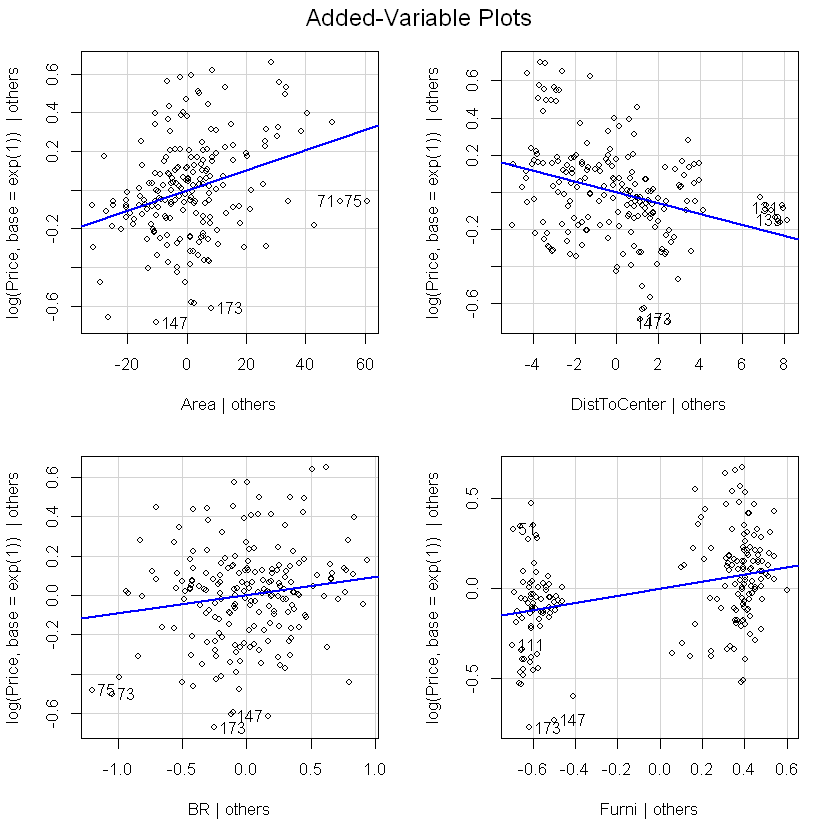

In [53]:
avPlots(improve2.1)

Interpreting model 2.1: keeping all other variables unchanged: 
<ul>
<li>If the apartment has 1 more bedroom, on average the rental price will increase by 9.746%</li>
<li>If the apartment is well-furnished, on average the rental price will increase by 21.896%</li>
<li>If the apartment total area increases by 1 m2 , on average the rental price will increase by 0.501%</li>
<li>If the apartment’s distance to city center increases by 1km, on average the rental price will decrease by 2.955%</li>
</ul>

Limitations of Model 2.1:
<ul>
<li>Intercept gives false information: suppose an “apartment” with 0 bedrooms, no furniture, no area, and is at the city centre. This apartment would have an average rental price of 9.33 million VND, which is false as it should have been 0 VND.</li>
<li>Model 2.1 shows no error relating to omitted variable, but only at ∝ = 5%. If ∝ was 10% instead, model 2.1 would reject the null hypothesis – indicating that it had error relating to omitted variable. So model 2.1 might still need additional variables or more tuning. Unfortunately, all variables listed were all the readily available specifications of the apartment.</li>
</ul>